In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv 
from scipy.spatial.distance import cdist
import pandas as pd

### Open Iris File

Read the iris file into a list called *iris*. Create a dictionary of classes to values to make a color map based on the categories that are in the iris dataset.

In [2]:
names = ('s_l','s_w','p_l','p_w',)
with open('iris.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    iris = [[],[],[],[],[]]
    d = dict()
    for row in reader:
        iris[0][:] += [float(row['sepal_length'])]
        iris[1][:] += [float(row['sepal_width'])]
        iris[2][:] += [float(row['petal_length'])]
        iris[3][:] += [float(row['petal_width'])]
        iris[4][:] += [row['class']]
        if row['class'] not in d:
            d[row['class']] = len(d)

### plot 3 categories function

This takes a subplot and makes a scatterplot using the x,y,categories, and title. If you don't want any categories,then set all the values in categories to be 1.

In [3]:

def plot3cat(ax,xVec,yVec,categories,the_title):
    colormap = np.array(['r', 'g', 'b'])
    ax.scatter(xVec, yVec, s=10, c=colormap[categories])
    ax.set_title(the_title)

### Make a grid of plots based on pairs of features.

*m* is the category mapping 
make a 3x3 grid to get the diagonal grid of pairs.


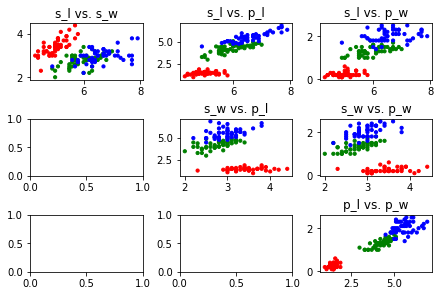

In [4]:
m = [d[x] for x in iris[4]]
categories = np.array(m)
fig, subplots = plt.subplots(3,3, constrained_layout=True)
k=0
for i in range(4):
    for j in range(i+1,4):
        plot3cat(subplots[i][j-1],
                 iris[i],iris[j],categories, 
                 names[i] + " vs. " + names[j])
        k = k + 1

### Read in the Aggregation file



In [5]:
names = ('X','Y')
with open('aggregation.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    agg = [[],[],[]]
    e = dict()
    for row in reader:
        agg[0][:] += [float(row['X'])]
        agg[1][:] += [float(row['Y'])]
        agg[2][:] += [row['label']]
        if row['label'] not in e:
            e[row['label']] = len(e)

### helper function to plot 7 categories

In [6]:
def plot7cat(ax,xVec,yVec,categories,the_title):
    colormap = np.array(['r', 'g', 'b','c','m','y','k'])
    ax.scatter(xVec, yVec, s=10, c=colormap[categories])
    ax.title(the_title)

### plot the aggregation.csv

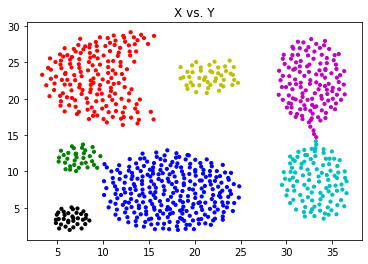

In [7]:
m = [e[x] for x in agg[2]]
categories = np.array(m)
plot7cat(plt,agg[0],agg[1],categories, 
         names[0] + " vs. " + names[1])

### K-Means

1. select k vectors from s as the estimate of the means mu1...muK
2. create k empty sets, g1...gk
3. for each vector, v, in the s put v in the set gJ where v is closest to muJ
4. compute mu1...muK by taking the means of g1...gK
5. repeat until the means stop changing

### Task 1

Implement k-means for a vector of dimension 1. Test your implementation on the vector [1,2,3,7,8,9,15,16,17]
If you run it multiple times, do you end up with the same final means each time?

In [8]:
items1D = [1,2,3,7,8,9,15,16,17]

In [9]:
from statistics import mean

def kmeans1D(X,n,k=3):
    l = []
    for i in range(k):
        l.append(X[i])
    x = 0
    while (x < n):
        c1 = []
        c2 = []
        c3 = []
        for i in range(len(X)):
            x1 = abs(l[0]-X[i])
            x2 = abs(l[1]-X[i])
            x3 = abs(l[2]-X[i])
            if (x1 == min(x1,x2,x3)):
                c1.append(X[i])
            elif (x2 == min(x1,x2,x3)):
                c2.append(X[i])
            elif (x3 == min(x1,x2,x3)):
                c3.append(X[i])
        l = [mean(c1),mean(c2),mean(c3)]
        x = x+1
    return l

In [10]:
for i in range(10):
    print("Iteration " + str(i) + ":")
    print(kmeans1D(items1D, i))

Iteration 0:
[1, 2, 3]
Iteration 1:
[1, 2, 10.714285714285714]
Iteration 2:
[1, 2.5, 12]
Iteration 3:
[1, 4, 13]
Iteration 4:
[1.5, 6, 14.25]
Iteration 5:
[2, 8, 16]
Iteration 6:
[2, 8, 16]
Iteration 7:
[2, 8, 16]
Iteration 8:
[2, 8, 16]
Iteration 9:
[2, 8, 16]


When kmeans is run multiple times, the means gradually increase until they eventually converge. In this case, I chose 3 clusters, and the mean of each cluster converges at 2, 8, and 16 respectively after 5 iterations.

### Task 2

Extend your implementation to work with up to at least 4 dimensions. Test your implementation on all of the features of the iris data set.
If you run it multiple times, do you end up with the same final means each time?

In [11]:
items = []
with open('iris.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    d = dict()
    for row in reader:
        items.append([float(row['sepal_length']),
                     float(row['sepal_width']),
                     float(row['petal_length']),
                     float(row['petal_width'])])

In [12]:
from statistics import mean
from scipy.spatial.distance import euclidean

def kmeans4D(X,n,k=2):
    m1 = X[0]
    m2 = X[1]
    x = 0
    while (x < n):
        dist = []
        for i in range(len(X)):
            dist.append([euclidean(X[i], m1),euclidean(X[i], m2)])
        c1 = []
        c2 = []
        for i in range(len(dist)):
            if (dist[i][0] <= dist[i][1]):
                c1.append(X[i])
            else:
                c2.append(X[i])
        m1_1 = 0
        m1_2 = 0
        m1_3 = 0
        m1_4 = 0
        m2_1 = 0
        m2_2 = 0
        m2_3 = 0
        m2_4 = 0
        for i in range(len(c1)):
            m1_1 = m1_1+c1[i][0]
            m1_2 = m1_2+c1[i][1]
            m1_3 = m1_3+c1[i][2]
            m1_4 = m1_4+c1[i][3]
        for i in range(len(c2)):
            m2_1 = m2_1+c2[i][0]
            m2_2 = m2_2+c2[i][1]
            m2_3 = m2_3+c2[i][2]
            m2_4 = m2_4+c2[i][3]
        m1 = [m1_1/len(c1), m1_2/len(c1), m1_3/len(c1), m1_4/len(c1)]
        m2 = [m2_1/len(c2), m2_2/len(c2), m2_3/len(c2), m2_4/len(c2)]
        x = x+1
    return [m1,m2]

In [13]:
for i in range(10):
    print("Iteration " + str(i+1) + ":")
    print(kmeans4D(items,i))

Iteration 1:
[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2]]
Iteration 2:
[[6.144444444444443, 3.263333333333335, 3.994444444444446, 1.3199999999999994], [5.3916666666666675, 2.74, 3.405, 1.0166666666666666]]
Iteration 3:
[[6.416470588235291, 2.9447058823529413, 5.114117647058824, 1.7658823529411771], [5.093846153846155, 3.1969230769230776, 1.9861538461538466, 0.456923076923077]]
Iteration 4:
[[6.321052631578945, 2.898947368421053, 4.989473684210527, 1.7105263157894743], [5.0181818181818185, 3.3218181818181827, 1.6327272727272726, 0.3145454545454545]]
Iteration 5:
[[6.30103092783505, 2.8865979381443303, 4.958762886597939, 1.6958762886597945], [5.005660377358491, 3.360377358490567, 1.562264150943396, 0.2886792452830188]]
Iteration 6:
[[6.30103092783505, 2.8865979381443303, 4.958762886597939, 1.6958762886597945], [5.005660377358491, 3.360377358490567, 1.562264150943396, 0.2886792452830188]]
Iteration 7:
[[6.30103092783505, 2.8865979381443303, 4.958762886597939, 1.6958762886597945], [5.00566

The means change every time but eventually converge after 5 iterations.

### Task 3

Test your implementation on the aggregation.csv data set. Run k-means using 2 through 11 means, compute the sum of squared differences from the closest mean, and plot the sum as a function of k. What number of k is at the elbow of the plot? How far away is the elbow from the number of actual classes (7)?

In [14]:
itemsAgg = []
with open('aggregation.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    d = dict()
    for row in reader:
        itemsAgg.append([float(row['X']),
                     float(row['Y']),
                     float(row['label'])])

In [15]:
from statistics import mean
from scipy.spatial.distance import euclidean

def kmeansND(X,n,d,k):
    m = []
    for i in range(k):
        m.append(X[i])
    x = 0
    while (x < n):
        dist = []
        for i in range(len(X)):
            l = []
            for j in range(k):
                l.append(euclidean(X[i],m[j]))
            dist.append(l)
        c1 = []
        c2 = []
        for i in range(len(dist)):
            if (dist[i][0] <= dist[i][1]):
                c1.append(X[i])
            else:
                c2.append(X[i])
        m[0] = []
        m[1] = []
        for i in range(d):
            m[0].append(0)
            m[1].append(0)
        for i in range(len(c1)):
            for j in range(d):
                m[0][j] = m[0][j]+c1[i][j]
        for i in range(len(c2)):
            for j in range(d):
                m[1][j] = m[1][j]+c2[i][j]
        m[0] = [x/len(c1) for x in m[0]]
        m[1] = [x/len(c2) for x in m[1]]
        x = x+1
    return m

In [21]:
for i in range(2,12):
    print("Iteration " + str(i) + ": ")
    print(kmeansND(itemsAgg,i,3,2))

Iteration 2: 
[[31.996069868995626, 18.082751091703056, 4.493449781659389], [14.475044722719137, 12.5695885509839, 3.474060822898032]]
Iteration 3: 
[[31.876550387596897, 16.866860465116286, 4.310077519379845], [13.574528301886787, 12.85981132075472, 3.5075471698113208]]
Iteration 4: 
[[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]]
Iteration 5: 
[[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]]
Iteration 6: 
[[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]]
Iteration 7: 
[[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]]
Iteration 8: 
[[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]]
Iteration 9: 
[[31.766412213740455, 16

In [180]:
means = []
for i in range(2,12):
    means.append(kmeansND(itemsAgg,i,3,2))

In [181]:
print(means)

[[[31.996069868995626, 18.082751091703056, 4.493449781659389], [14.475044722719137, 12.5695885509839, 3.474060822898032]], [[31.876550387596897, 16.866860465116286, 4.310077519379845], [13.574528301886787, 12.85981132075472, 3.5075471698113208]], [[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]], [[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]], [[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]], [[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]], [[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]], [[31.766412213740455, 16.722137404580156, 4.305343511450381], [13.490209125475278, 12.901425855513313, 3.5038022813688214]], [[3

In [182]:
a = np.array(means)
a_mean = a.T.mean(axis=1)
a_std = a.T.std(axis=1)

In [183]:
SSE1 = []
for i in range(len(a_std)):
    for j in range(len(a_std[i])):
        a_std[i][j] = a_std[i][j]**2
        SSE1.append(a_std[i][j])

In [184]:
SSE = []
s = 0
for i in range(len(SSE1)):
    if i%3 != 0:
        s = s+SSE1[i]
    elif i%3 == 0:
        SSE.append(s/3)
        s = 0

In [187]:
k = []
for i in range(2,12):
    k.append(i)

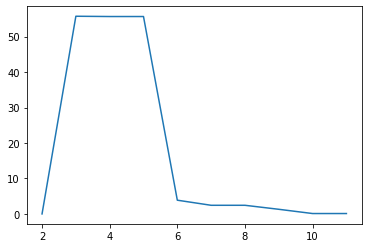

In [188]:
plt.plot(k,SSE)
plt.show()

The number for the elbow on the plot is 6, and that is only one mean away from the number of actual classes (7).